In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('data/Clean_Student.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [44]:
X = df.drop('math score', axis=1)
y = df['math score']

In [45]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

neumeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), neumeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [46]:
X = preprocessor.fit_transform(X)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape, X_test.shape

((800, 21), (200, 21))

In [49]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


models = {
    'Linear Regression': LinearRegression(
        fit_intercept=True, copy_X=True, n_jobs=-1
    ),
    'Lasso': Lasso(
        fit_intercept=True, copy_X=True, alpha=0.001
    ),
    'Ridge': Ridge(
        fit_intercept=True, copy_X=True, alpha=0
    ),
    'Random Forest': RandomForestRegressor(
        max_depth= 50, min_samples_leaf=2, min_samples_split= 2, n_estimators= 100
    ),
    'SVR': SVR(
        degree= 1, gamma= 'scale', kernel= 'linear'
    ),
    'Decision Tree': DecisionTreeRegressor(
        criterion= 'friedman_mse',
 max_depth= 50,
 min_samples_leaf= 2,
 min_samples_split= 2,
 splitter= 'best'
    ),
    'KNeighbors': KNeighborsRegressor()
}

In [50]:
m = []
r2 = []

def evaluate_model(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        m.append(name)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2.append(r2_score(y_test, y_pred))
        print(f'{name}:')
        print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
        print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
        print(f'R2 Score: {r2_score(y_test, y_pred)}')
        print('---------------------------------------')

In [51]:

evaluate_model(models, X_train, X_test, y_train, y_test)



Linear Regression:
Mean Squared Error: 1.9190903231237434e-26
Mean Absolute Error: 1.0931699989669141e-13
R2 Score: 1.0
---------------------------------------
Lasso:
Mean Squared Error: 0.0002315511537687607
Mean Absolute Error: 0.011878341908690224
R2 Score: 0.9999990484397293
---------------------------------------
Ridge:
Mean Squared Error: 1.068281748737536e-26
Mean Absolute Error: 8.245848448495963e-14
R2 Score: 1.0
---------------------------------------
Random Forest:
Mean Squared Error: 10.181234883085875
Mean Absolute Error: 2.2217619913419933
R2 Score: 0.9581601798849426
---------------------------------------
SVR:
Mean Squared Error: 0.00643106966153991
Mean Absolute Error: 0.06259212709216215
R2 Score: 0.9999735714968885
---------------------------------------
Decision Tree:
Mean Squared Error: 16.568055555555556
Mean Absolute Error: 3.106666666666667
R2 Score: 0.93191351814775
---------------------------------------
KNeighbors:
Mean Squared Error: 26.8204
Mean Absolute Er

In [52]:
from sklearn.model_selection import GridSearchCV

linear_params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

lasso_params = {
    'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

ridge_params = {
    'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

random_forest_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [10, 50, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svr_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 2, 3, 4, 5, 6],
    'gamma': ['scale', 'auto']

}

decision_tree_params = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 50, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

kneighbors_params = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}



In [53]:

def grid_search_cv(model, params, X_train, y_train):
    grid = GridSearchCV(model, params, cv=5, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_params_

In [54]:

# grid_search_cv(KNeighborsRegressor(), kneighbors_params, X_train, y_train)
# grid_search_cv(DecisionTreeRegressor(), decision_tree_params, X_train, y_train)
# grid_search_cv(SVR(), svr_params, X_train, y_train)
# grid_search_cv(RandomForestRegressor(), random_forest_params, X_train, y_train)
# grid_search_cv(Ridge(), ridge_params, X_train, y_train)
# grid_search_cv(Lasso(), lasso_params, X_train, y_train)
# grid_search_cv(LinearRegression(), linear_params, X_train, y_train)


In [55]:
pd.DataFrame({'Model': m, 'R2 Score': r2}).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.999999
4,SVR,0.999974
3,Random Forest,0.958160
5,Decision Tree,0.931914
6,KNeighbors,0.889781


<Axes: xlabel='R2 Score', ylabel='Model'>

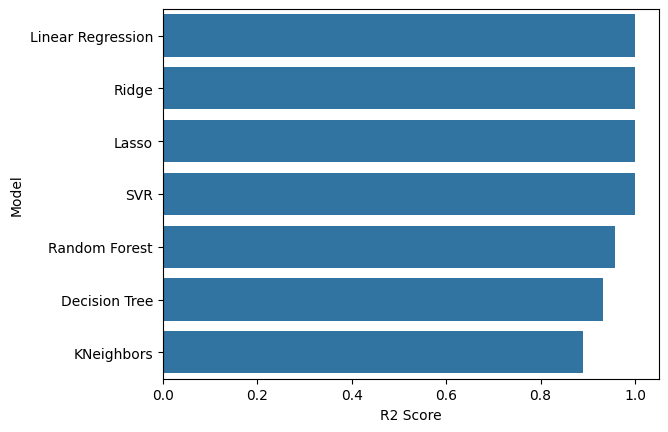

In [56]:
sns.barplot(x='R2 Score', y='Model', data=pd.DataFrame({'Model': m, 'R2 Score': r2}).sort_values(by='R2 Score', ascending=False))

In [61]:
# Difference between predicted and actual values

pd.DataFrame({'Actual': y_test, 'Predicted': models['Random Forest'].predict(X_test), 'Difference': y_test-models['Random Forest'].predict(X_test)}).head(10)

,Actual,Predicted,Difference
521,91,82.824349,8.175651
737,53,55.472476,-2.472476
740,80,77.180310,2.819690
660,74,73.719274,0.280726
411,84,83.575151,0.424849
678,81,83.300381,-2.300381
626,69,68.607905,0.392095
513,54,53.353095,0.646905
859,87,82.441583,4.558417
136,51,48.687210,2.312790
